In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets,manifold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = datasets.fetch_openml( 'mnist_784', version=1, return_X_y=True )
pixel_values, targets = data
targets = targets.astype(int)

In [3]:
pixel_values.shape

(70000, 784)

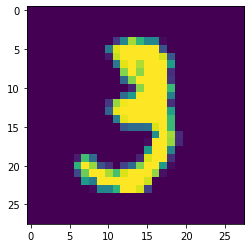

In [6]:
plt.imshow(pixel_values[10,:].reshape(28,28))

In [8]:
tsne=manifold.TSNE(n_components=2,verbose=1,n_jobs=-1)

In [11]:
transformed=tsne.fit_transform(pixel_values[:3000,:])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.211s...
[t-SNE] Computed neighbors for 3000 samples in 7.826s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 480.474473
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.791046
[t-SNE] KL divergence after 1000 iterations: 1.268667


**T-SNE** 

In [24]:
new_df=pd.DataFrame(
np.column_stack((transformed,targets[:3000])),    
    columns=["t1","t2","target"]
)

In [31]:
import matplotlib

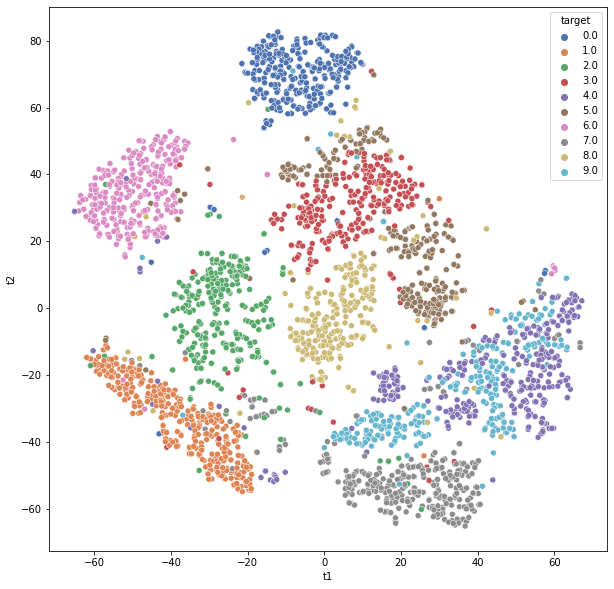

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="t1",y="t2",hue="target",data=new_df,palette="deep")
plt.show()

**Cross Validation**

In [37]:
X, y = datasets.make_regression(
 n_samples=15000, n_features=100, n_targets=1
 )
 # create a dataframe out of our numpy arrays
df = pd.DataFrame(
 X,
 columns=[f"f_{i}" for i in range(X.shape[1])]
 )
df.loc[:, "target"] = y

In [42]:
df.columns

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       ...
       'f_91', 'f_92', 'f_93', 'f_94', 'f_95', 'f_96', 'f_97', 'f_98', 'f_99',
       'target'],
      dtype='object', length=101)

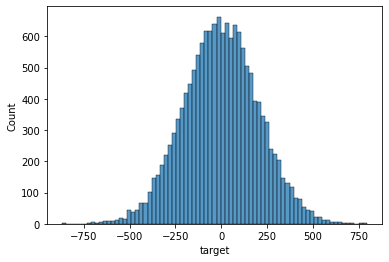

In [48]:
sns.histplot(df["target"],bins="auto")

In [49]:
# Making an A Hold out Cross Validation

In [50]:
from sklearn.model_selection import KFold,StratifiedKFold

In [55]:
df=df.sample(frac=1).reset_index(drop=True)
train=df.loc[:10000,:]
test=df.loc[10000:len(df),:]
print(train.shape)
print(test.shape)

(10001, 101)
(5000, 101)


In [57]:
## Making an KFold Cross Validation

In [60]:
kfold=KFold(n_splits=5,shuffle=True)

In [86]:
for i,(trn,val) in enumerate(kfold.split(X=df.head(20))):
  print(i,trn,val)
  df.loc[val,"split"]=i

0 [ 0  1  2  3  4  5  6  7  8  9 10 12 13 16 17 19] [11 14 15 18]
1 [ 1  2  3  4  5  7 10 11 12 13 14 15 16 17 18 19] [0 6 8 9]
2 [ 0  1  2  4  6  8  9 10 11 12 13 14 15 16 17 18] [ 3  5  7 19]
3 [ 0  1  3  4  5  6  7  8  9 11 13 14 15 16 18 19] [ 2 10 12 17]
4 [ 0  2  3  5  6  7  8  9 10 11 12 14 15 17 18 19] [ 1  4 13 16]


In [87]:
df.head(20)["split"]

0     1.0
1     4.0
2     3.0
3     2.0
4     4.0
5     2.0
6     1.0
7     2.0
8     1.0
9     1.0
10    3.0
11    0.0
12    3.0
13    4.0
14    0.0
15    0.0
16    4.0
17    3.0
18    0.0
19    2.0
Name: split, dtype: float64

In [88]:
##Stratified K Fold:

In [95]:
df["target"].astype("int")

0        281
1         73
2        317
3         26
4        177
        ... 
14995    116
14996     39
14997   -105
14998    -56
14999    105
Name: target, Length: 15000, dtype: int64

In [96]:
df["target"].dtype

dtype('int64')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 104 entries, f_0 to tarbin
dtypes: float64(101), int64(3)
memory usage: 11.9 MB


In [108]:
df["tarbin"]=pd.cut(df["target"],bins=int(np.floor(1+np.log(len(df)))),labels=False)

In [109]:
df["tarbin"].value_counts()

5    4654
4    4051
6    2791
3    1892
7     924
2     435
8     166
1      65
9      16
0       6
Name: tarbin, dtype: int64

In [113]:
skf=StratifiedKFold(n_splits=5,shuffle=True)
for i ,(trn,val) in enumerate(skf.split(X=df,y=df.tarbin)):
  df.loc[val,"tsplit"]=i

In [115]:
for i in skf.split(X=df,y=df.tarbin):
                   print(i)

(array([    0,     1,     2, ..., 14997, 14998, 14999]), array([    3,     7,    14, ..., 14991, 14994, 14996]))
(array([    0,     1,     3, ..., 14996, 14998, 14999]), array([    2,     8,    15, ..., 14987, 14995, 14997]))
(array([    0,     1,     2, ..., 14996, 14997, 14998]), array([    5,     6,     9, ..., 14992, 14993, 14999]))
(array([    1,     2,     3, ..., 14996, 14997, 14999]), array([    0,     4,    24, ..., 14988, 14990, 14998]))
(array([    0,     2,     3, ..., 14997, 14998, 14999]), array([    1,    11,    12, ..., 14978, 14981, 14985]))
